In [6]:
import numpy as np

N =10
xscale=10
#noise
mean = 0
stedv = 1
x = np.random.rand(N)*xscale
noise = np.random.normal(loc=mean,scale=stedv,size=N)
y=x*2+5+noise

[2.39997864 0.39032968 5.96153452 7.89098562 6.08992276 3.99928599
 1.85968474 2.87678443 5.69139587 9.03595703]
[-0.58208427  0.39271758  2.62037532  0.77221359  0.36101963 -0.82758195
  1.23510866 -0.71390029  1.12853297  0.8720086 ]
[ 9.21787302  6.17337695 19.54344436 21.55418482 17.54086514 12.17099004
  9.95447814 10.03966856 17.51132472 23.94392267]


In [8]:
def dataGen(N=100,xscale=10,mean=0,stedv=1):
    x = np.random.rand(N)*xscale
    noise = np.random.normal(loc=mean,scale=stedv,size=N)
    y=x*2+5+noise
    return(x,y)

(array([4.95014511, 2.36974134, 6.1037232 , 6.96635602, 7.3673618 ,
       3.31320738, 6.62230246, 8.34263615, 0.75886235, 6.98002411]), array([13.5453702 ,  8.606142  , 16.01053219, 19.50219545, 20.10205431,
       12.26688748, 16.87495037, 20.76945358,  6.56850759, 19.14800236]))


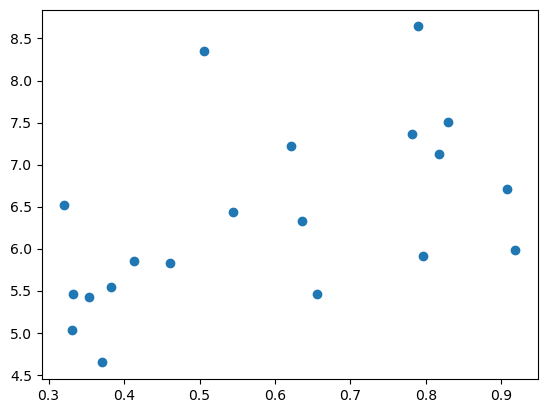

In [11]:
import matplotlib.pyplot as plt

(x,y) = dataGen(20,1)
plt.scatter(x,y)

In [16]:
from sklearn.linear_model import LinearRegression

(x,y) = dataGen(200,1,stedv=0.3)
X=x[:,np.newaxis]
model = LinearRegression()
model.fit(X,y)
print(model.coef_[0],model.intercept_,model.score(X,y))

1.9337933942949925 5.036725425177292 0.7585127786256027


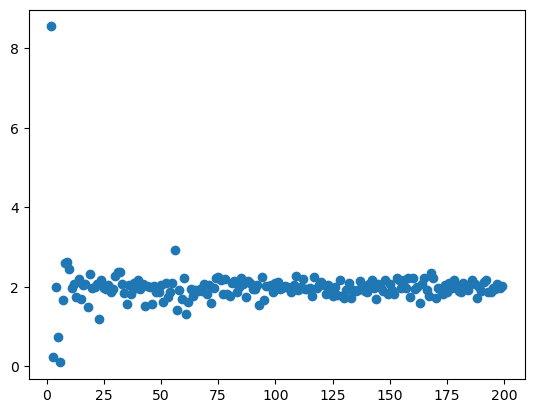

In [25]:
repeats = 5
Ns=np.arange(2,200)
coeffs=[]

for N in Ns:
    (x,y) = dataGen(N,1,stedv=0.5)
    X=x[:,np.newaxis]
    coeff = []
    for k in range(repeats):
        model = LinearRegression()
        model.fit(X,y)
        coeff.append(model.coef_)

    coeffs.append(np.mean(coeff))

coeffs=np.array(coeffs)

plt.scatter(Ns,coeffs)
plt.show()